In [257]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

from cycler import cycler
from collections import defaultdict, OrderedDict
from datetime import datetime
import re

import matplotlib as mpl
from matplotlib import pyplot as plt
import numpy as np

from benchmark import Options
from bench_api import *

def show_time(f):
    def _wrapper(*args):
        print(datetime.now())
        f(*args)
    return _wrapper

def replacer(regex):
    def decorator(f):
        def wrapper(m):
            return re.sub(regex, f, m)
        return wrapper
    return decorator

mpl.rcParams['axes.prop_cycle'] = cycler(color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
                                                '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf',
                                               ],
                                         #linestyle=["-", "--", "-.", ":", "-", "--", "-.", ":"]
                                        )

@show_time
def big():
    plt.rcParams["figure.figsize"] = (24, 15)
@show_time
def medium():
    plt.rcParams["figure.figsize"] = (16, 10)
@show_time
def ideal(w=10, h=6):
    plt.rcParams["figure.figsize"] = (w, h)
@show_time
def small():
    plt.rcParams["figure.figsize"] = (6, 4)

# Bounded buffer

2017-06-08 16:04:42.338345
Fast production


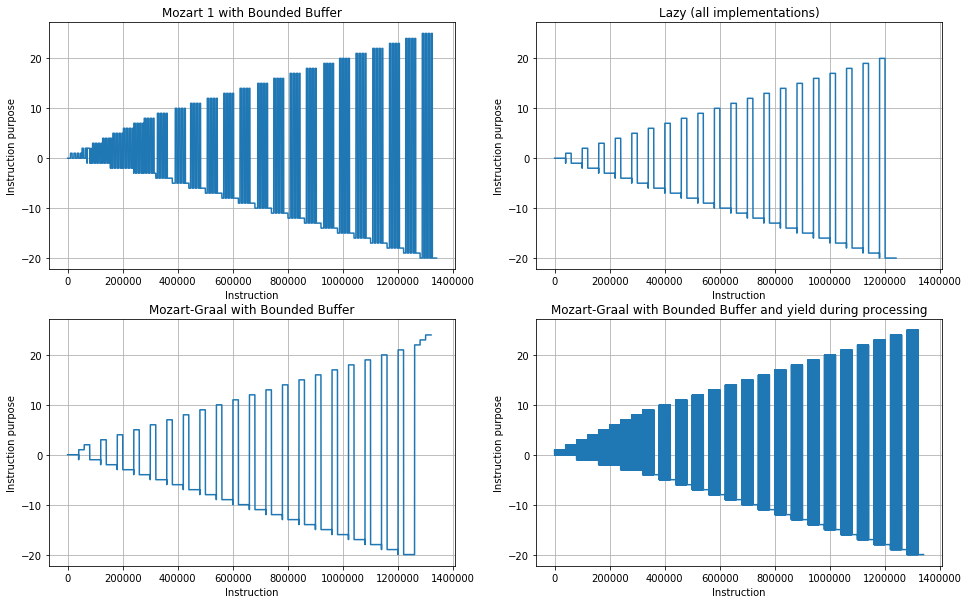

Even speed


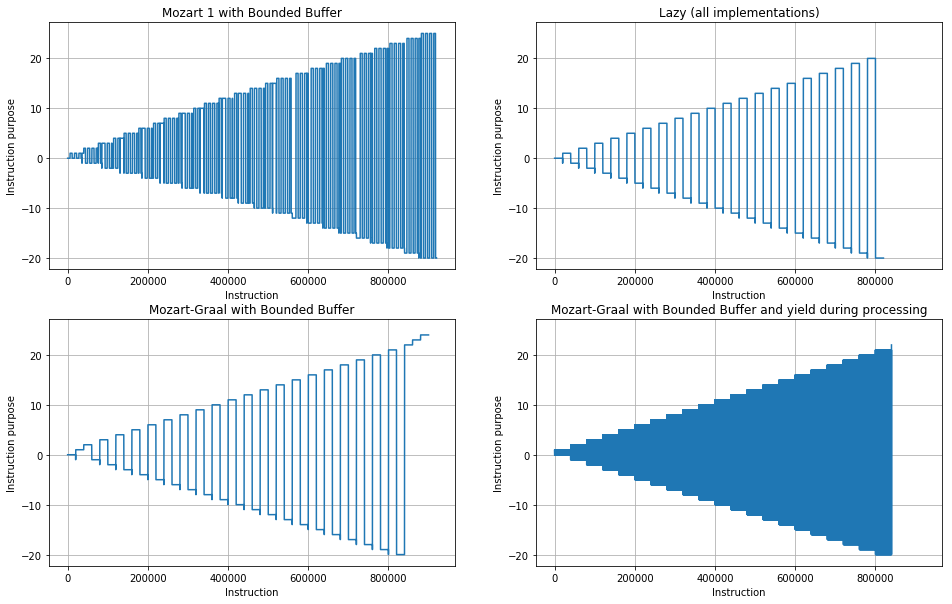

Slow production


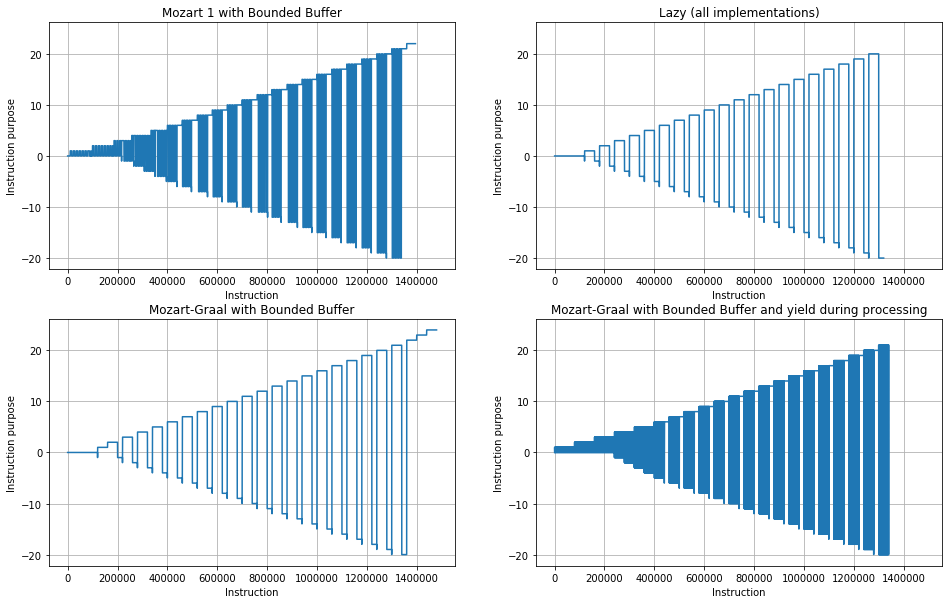

In [227]:
medium()
boundedbuffer = Serie("boundedbuffer")
bb = lambda *args, **kwargs: boundedbuffer.get("active", conv=asis, *args, **kwargs)
ax = []

args = dict(xlabel="Instruction", ylabel="Instruction purpose")

print("Fast production")
bb([0]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([1]).sub(223, sharex=ax[0], sharey=ax[0], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([2]).sub(224, sharex=ax[0], sharey=ax[0], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None, **args).grid()
bb([3]).sub(222, sharex=ax[0], sharey=ax[0], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None, **args).grid()
plt.show()

print("Even speed")
bb([4]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([5]).sub(223, sharex=ax[1], sharey=ax[1], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([6]).sub(224, sharex=ax[1], sharey=ax[1], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None, **args).grid()
bb([7]).sub(222, sharex=ax[1], sharey=ax[1], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None, **args).grid()
plt.show()

print("Slow production")
bb([8]).sub(221, init_axis=ax, title="Mozart 1 with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([9]).sub(223, sharex=ax[2], sharey=ax[2], title="Mozart-Graal with Bounded Buffer")\
    .plot(yscale=None, legend=None, **args).grid()
bb([10]).sub(224, sharex=ax[2], sharey=ax[2], title="Mozart-Graal with Bounded Buffer and yield during processing")\
    .plot(yscale=None, legend=None, **args).grid()
bb([11]).sub(222, sharex=ax[2], sharey=ax[2], title="Lazy (all implementations)")\
    .plot(yscale=None, legend=None, **args).grid()
plt.show()

2017-05-31 19:49:04.505509


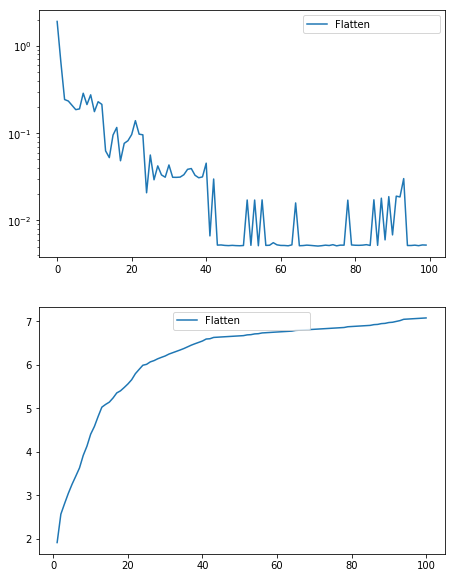

median [ 0.01715992]


In [143]:
medium()
general = Serie("general", n=range(1), prefix="doing").get("")
general.sub(221).plot()
general.sub(223).prog()

plt.show()


print("median", general.agg(np.median))

2017-05-28 15:26:24.744864


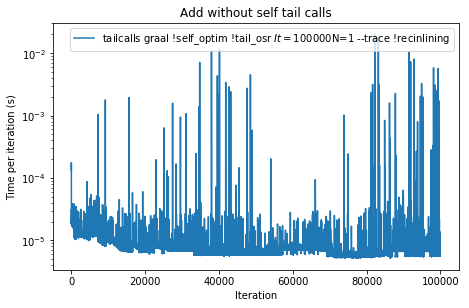

median [  6.62300000e-06]


In [86]:
medium()

tailcalls = Serie("tailcalls", n=range(1))
tail = tailcalls.get("", sections=[0], agg=first)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Add without self tail calls", **args1).plot()
plt.show()

print("median", tail.agg(np.median))

2017-06-08 14:31:07.761733


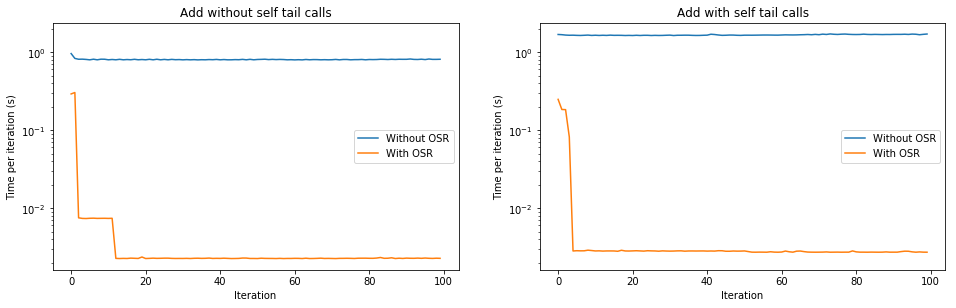

No & No & 804.28 \\ \hline
No & Yes & 2.27 \\ \hline
Yes & No & 1678.60 \\ \hline
Yes & Yes & 2.74 \\ \hline


In [209]:
medium()

tailcalls = Serie("tailcalls", n=range(1))
tail = tailcalls.get("", sections=[0, 1], agg=mean)
self = tailcalls.get("", sections=[2, 3], agg=mean)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
sections = ["Without OSR", "With OSR"]

tail.sub(221, init_axis=ax, title="Add without self tail calls", **args1).plot(sections=sections, legend="right")
#tail.sub(223, init_axis=ax, **args2).prog(legend=None)

self.sub(222, sharey=ax[0], title="Add with self tail calls", **args1).plot(sections=sections, legend=0)
#self.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

for (self, osr), ptime in zip(product(["No", "Yes"], ["No", "Yes"]), tailcalls.get("").peak_time()):
    print(r"{} & {} & {:0.2f} \\ \hline".format(self, osr, ptime*1000))

2017-06-08 16:32:39.271784


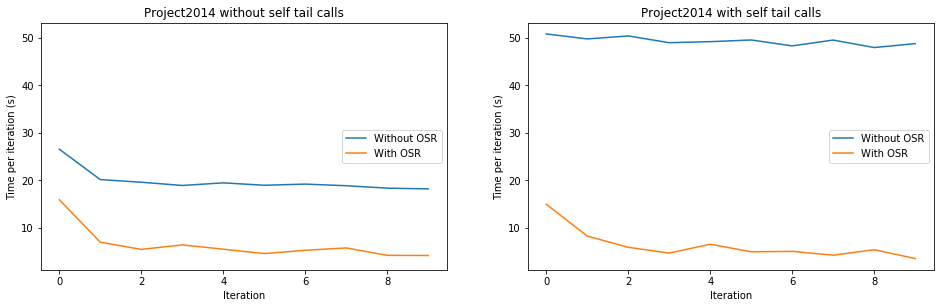

median [ 18.93127139   4.93427557  48.8437779    4.73467838]


In [232]:
medium()

tailcalls = Serie("tailcalls", n=range(5), prefix="project")
tail = tailcalls.get("", sections=[0, 1], agg=geomean)
self = tailcalls.get("", sections=[2, 3], agg=geomean)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
sections = ["Without OSR", "With OSR"]
tail.sub(221, init_axis=ax, title="Project2014 without self tail calls", **args1).plot(legend="right", sections=sections, yscale=None)
#tail.sub(223, init_axis=ax, **args2).prog(legend=None)

self.sub(222, sharey=ax[0], title="Project2014 with self tail calls", **args1).plot(legend="right", sections=sections, yscale=None)
#self.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

print("median", tailcalls.get("", agg=halfright_appended).agg(np.mean))

2017-06-05 00:33:51.598781


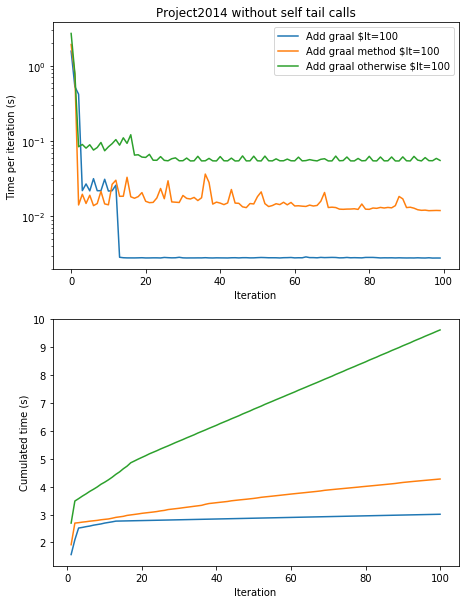

median [ 0.00281959  0.01474182  0.05582568]


In [77]:
medium()

tailcalls = Serie("tailcalls", n=range(1), prefix="methods")
tail = tailcalls.get("", sections=[0, 1, 2], agg=geomean)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Project2014 without self tail calls", **args1).plot(legend=0)
tail.sub(223, init_axis=ax, **args2).prog(legend=None)
plt.show()

print("median", tailcalls.get("", agg=geomean).agg(np.median))

2017-05-31 20:13:42.882370


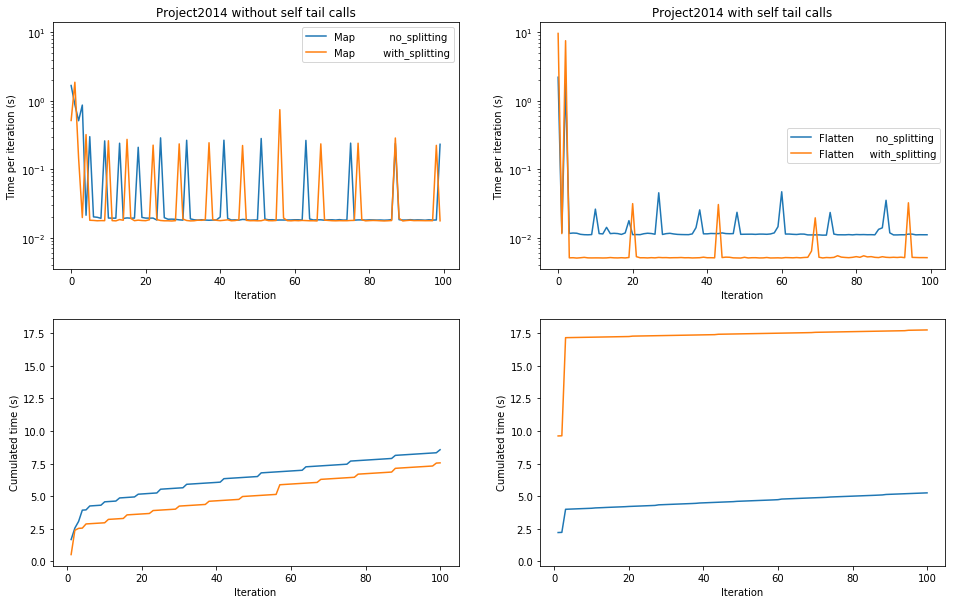

median [ 14.9074671    5.63066421  50.5599233    5.58146414]


In [150]:
medium()

splitting = Serie("splitting", n=0)
with_split = splitting.get("", sections=[0, 1])
no_split = splitting.get("", sections=[2, 3])
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

with_split.sub(221, init_axis=ax, title="Project2014 without self tail calls", **args1).plot(legend=0)
with_split.sub(223, init_axis=ax, **args2).prog(legend=None)

no_split.sub(222, sharey=ax[0], title="Project2014 with self tail calls", **args1).plot(legend="right")
no_split.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

print("median", tailcalls.get("", agg=geomean).agg(np.median))

2017-05-31 20:10:41.434215


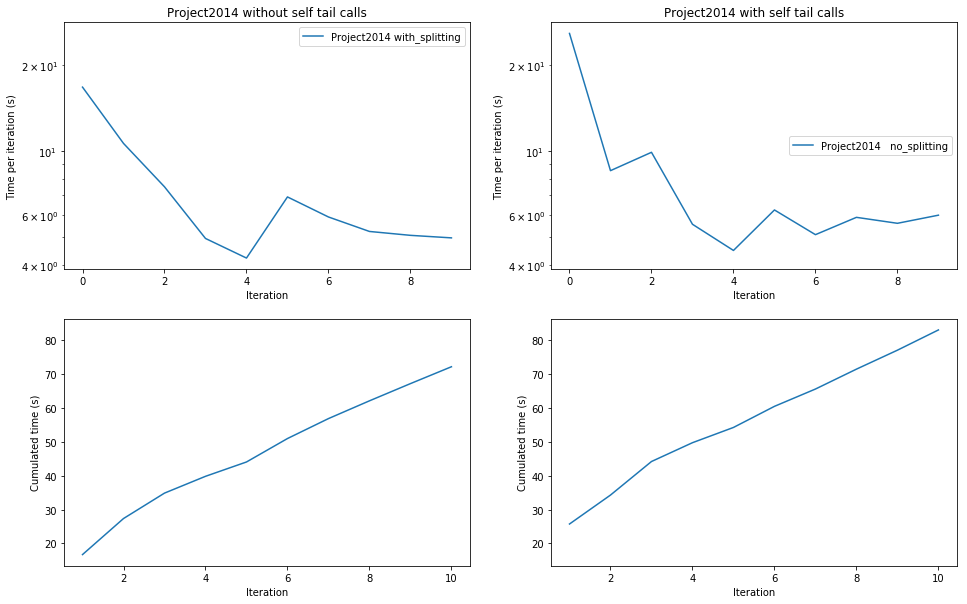

median [ 14.9074671    5.63066421  50.5599233    5.58146414]


In [149]:
medium()

splitting = Serie("splitting", n=0)
with_split = splitting.get("", sections=[5])
no_split = splitting.get("", sections=[4])
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

with_split.sub(221, init_axis=ax, title="Project2014 without self tail calls", **args1).plot(legend=0)
with_split.sub(223, init_axis=ax, **args2).prog(legend=None)

no_split.sub(222, sharey=ax[0], title="Project2014 with self tail calls", **args1).plot(legend="right")
no_split.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

print("median", tailcalls.get("", agg=geomean).agg(np.median))

2017-06-08 15:42:23.041903


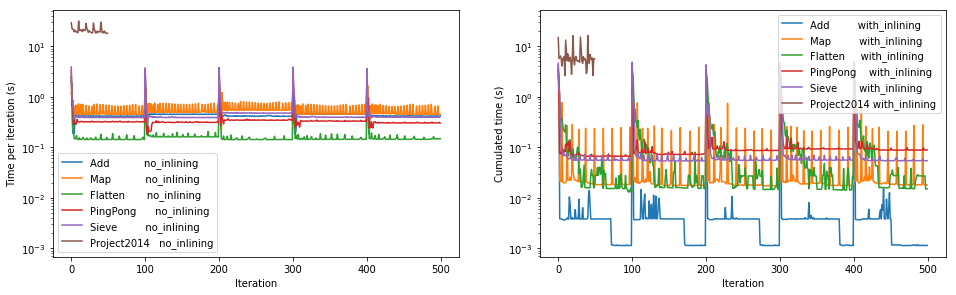

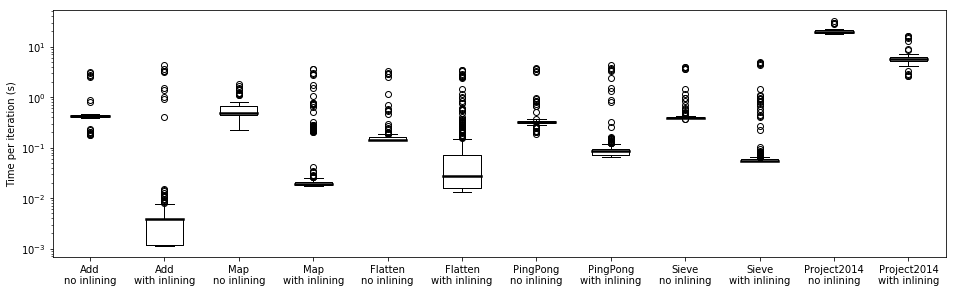

In [223]:
medium()

agg = appended
inlining = Serie("inlining", n=range(5), prefix="last")
with_inlining = inlining.get("", sections=[1, 3, 5, 7, 9, 11], agg=agg)
no_inlining = inlining.get("", sections=[0, 2, 4, 6, 8, 10], agg=agg)
inlining = inlining.get("", agg=agg)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
args3 = {"ylabel": "Time per iteration (s)"}
no_inlining.sub(221, init_axis=ax, **args1).plot(legend=0)
with_inlining.sub(222, sharey=ax[0], **args2).plot(legend=0)
plt.show()

#with_inlining.sub(222, sharey=ax[0], **args1).plot()
inlining.sub(212, **args3).boxplot(sections=["\n".join(sec.split())\
                                             .replace("_inlining", " inlining") for sec in inlining.sections])
plt.show()

#print("median", no_inlining.agg(np.median))
#print("median", with_inlining.agg(np.median))


2017-06-08 15:50:10.886477


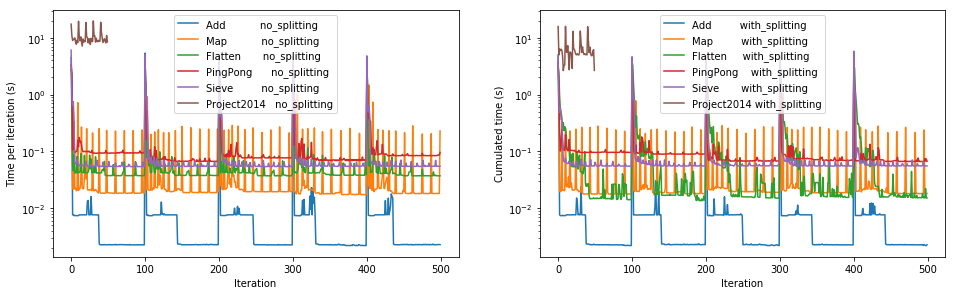

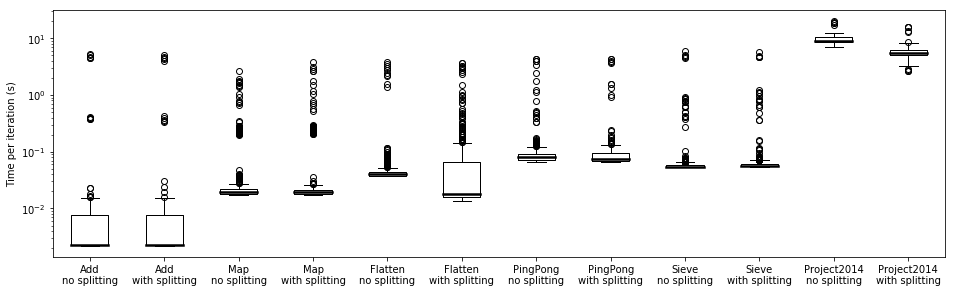

Add & 4105 & 3952 & (-3.72\%) & 8518 & 7219 & (-15.25\%) \\ \hline
Map & 5345 & 6996 & (+30.89\%) & 10759 & 12391 & (+15.17\%) \\ \hline
Flatten & 4677 & 35437 & (+657.74\%) & 9951 & 22267 & (+123.76\%) \\ \hline
PingPong & 4630 & 4508 & (-2.63\%) & 11381 & 11177 & (-1.80\%) \\ \hline
Sieve & 4702 & 4851 & (+3.18\%) & 10872 & 10957 & (+0.78\%) \\ \hline
Project2014 & 12514 & 18387 & (+46.93\%) & 24885 & 36152 & (+45.28\%) \\ \hline


In [225]:
medium()

splitting = Serie("splitting", n=range(5))
interesting = [0, 2, 4, 6, 8, 10]
wi_splitting = [i+1 for i in interesting]
wo_splitting = interesting
#with_inlining = inlining.get("", sections=[1, 3, 5, 7, 9, 11], agg=appended)
#no_inlining = inlining.get("", sections=[0, 2, 4, 6, 8, 10], agg=appended)
with_splitting = splitting.get("", sections=wi_splitting, agg=appended)
no_splitting = splitting.get("", sections=wo_splitting, agg=appended)
_splitting = splitting.get("", agg=appended)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
args3 = {"ylabel": "Time per iteration (s)"}
no_splitting.sub(221, init_axis=ax, **args1).plot(legend=0)
with_splitting.sub(222, sharey=ax[0], **args2).plot(legend=0)
plt.show()

#with_inlining.sub(222, sharey=ax[0], **args1).plot()
_splitting.sub(212, **args3).boxplot(sections=["\n".join(sec.split()).replace("_splitting", " splitting") for sec in _splitting.sections])
plt.show()

wi_astsize = splitting.get("_astsize", sections=wi_splitting, conv=np.array, agg=mean)
wi_codesize = splitting.get("_codesize", sections=wi_splitting, conv=np.array, agg=mean)
wi_time = splitting.get("_time", sections=wi_splitting, conv=np.array, agg=mean)

wo_astsize = splitting.get("_astsize", sections=wo_splitting, conv=np.array, agg=mean)
wo_codesize = splitting.get("_codesize", sections=wo_splitting, conv=np.array, agg=mean)
wo_time = splitting.get("_time", sections=wo_splitting, conv=np.array, agg=mean)

for sec, wi_astsize, wi_time, wo_astsize, wo_time in zip(wi_astsize.sections, wi_astsize.mat, wi_time.mat, wo_astsize.mat, wo_time.mat):
    print(r"""{} & {:0.0f} & {:0.0f} & ({:+0.2f}\%) & {:0.0f} & {:0.0f} & ({:+0.2f}\%) \\ \hline""".format(sec.split()[0],
                                                              wo_astsize, wi_astsize,(wi_astsize-wo_astsize)*100/wo_astsize,
                                                              wo_time, wi_time, (wi_time-wo_time)*100/wo_time
                                                             ))

#print("median", no_inlining.agg(np.median))
#print("median", with_inlining.agg(np.median))


2017-06-09 00:52:50.424746


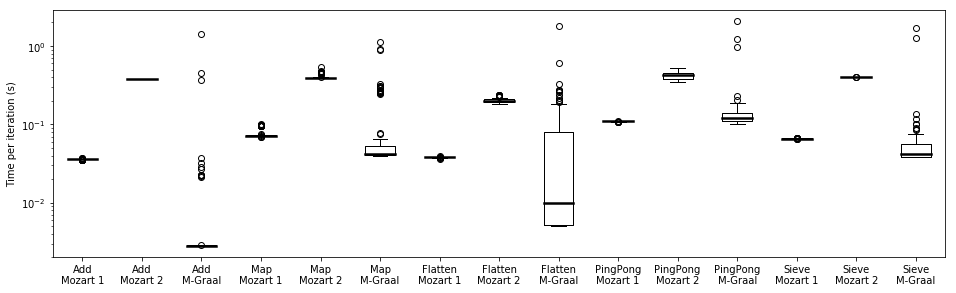

In [265]:
medium()

general = Serie("general", n=range(5))
interesting = [0, 3, 6, 9, 12]
mozart1 = interesting
mozart2 = [i+1 for i in interesting]
graal = [i+2 for i in interesting]
general = general.get("", sections=list(range(15)))

'''
mozart1 = splitting.get("", sections=mozart1, agg=appended)
mozart2 = splitting.get("", sections=mozart2, agg=appended)
_splitting = splitting.get("", agg=appended)
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
no_splitting.sub(221, init_axis=ax, **args1).plot(legend=0)
with_splitting.sub(222, sharey=ax[0], **args2).plot(legend=0)
plt.show()'''
args3 = {"ylabel": "Time per iteration (s)"}

@replacer("(mozart|graal)")
def repl(m):
    if m.group(0) == "mozart":
        return "Mozart "
    if m.group(0) == "graal":
        return "M-Graal"

#with_inlining.sub(222, sharey=ax[0], **args1).plot()
general.sub(212, **args3).boxplot(sections=[repl("\n".join(sec.split())) for sec in general.sections])
plt.show()

2017-06-09 00:33:15.296860


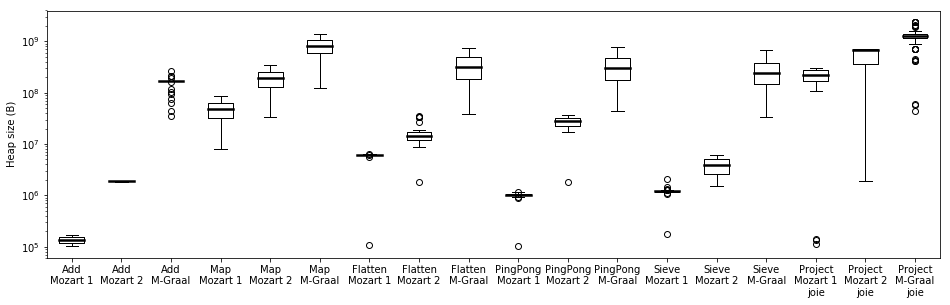

In [261]:
medium()

general = Serie("general", n=range(5))
interesting = [0, 3, 6, 9, 12, 15]
mozart1 = interesting
mozart2 = [i+1 for i in interesting]
graal = [i+2 for i in interesting]
general = general.get("memory", sections=list(range(18)), conv=asis)
'''
mozart1 = general.get("memory", sections=mozart1, conv=asis, agg=appended)
mozart2 = general.get("memory", sections=mozart2, conv=asis, agg=appended)
graal = general.get("memory", sections=graal, conv=asis, agg=appended)
ax = []
args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
mozart1.sub(231, init_axis=ax, **args1).plot(legend=0)
mozart2.sub(232, sharey=ax[0], **args2).plot(legend=0)
graal.sub(233, sharey=ax[0], **args2).plot(legend=0)
'''
general.sub(212, ylabel="Heap size (B)").boxplot(sections=[repl("\n".join(sec.split())).replace("Project2014", "Project") for sec in general.sections])
plt.show()

2017-06-09 00:32:05.468731


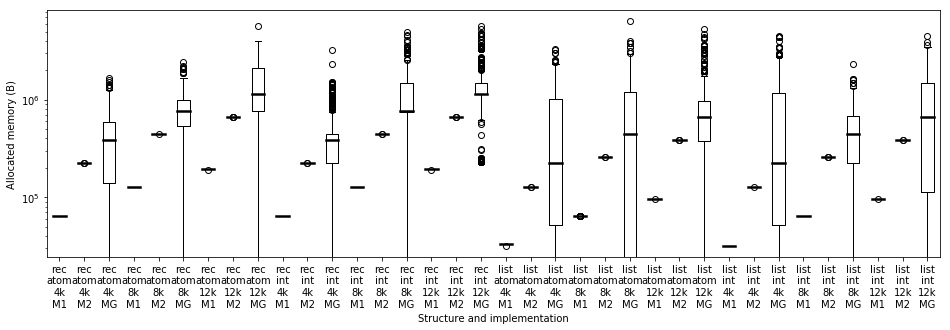

\cline{1-6} \multirow{6}{*}{Record} & \multirow{3}{*}{Atom} & 4000 & 63488 & 223984 (x3.5) & 383988 (x6.0) \\
\cline{3-6}   &   & 8000 & 128000 & 447984 (x3.5) & 768024 (x6.0) \\
\cline{3-6}   &   & 12000 & 192512 & 671984 (x3.5) & 1152064 (x6.0) \\
\cline{2-6}   & \multirow{3}{*}{Int} & 4000 & 63488 & 223984 (x3.5) & 384024 (x6.0) \\
\cline{3-6}   &   & 8000 & 128000 & 447984 (x3.5) & 768248 (x6.0) \\
\cline{3-6}   &   & 12000 & 192512 & 671984 (x3.5) & 1152024 (x6.0) \\
\cline{1-6} \multirow{6}{*}{List} & \multirow{3}{*}{Atom} & 4000 & 32768 & 127984 (x3.9) & 226144 (x6.9) \\
\cline{3-6}   &   & 8000 & 64512 & 255984 (x4.0) & 448024 (x6.9) \\
\cline{3-6}   &   & 12000 & 96256 & 383984 (x4.0) & 672080 (x7.0) \\
\cline{2-6}   & \multirow{3}{*}{Int} & 4000 & 31744 & 127984 (x4.0) & 225544 (x7.1) \\
\cline{3-6}   &   & 8000 & 63488 & 255984 (x4.0) & 448068 (x7.1) \\
\cline{3-6}   &   & 12000 & 95232 & 383984 (x4.0) & 672024 (x7.1) \\


In [260]:
medium()
from itertools import product
general = Serie("memory", n=range(1))
interesting = [0, 3, 6, 9,]
mozart1 = interesting
mozart2 = [i+1 for i in interesting]
graal = [i+2 for i in interesting]
general = general.get("memory", conv=asis)
'''
mozart1 = general.get("memory", sections=mozart1, conv=asis, agg=appended)
mozart2 = general.get("memory", sections=mozart2, conv=asis, agg=appended)
graal = general.get("memory", sections=graal, conv=asis, agg=appended)
ax = []
args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
mozart1.sub(231, init_axis=ax, **args1).plot(legend=0)
mozart2.sub(232, sharey=ax[0], **args2).plot(legend=0)
graal.sub(233, sharey=ax[0], **args2).plot(legend=0)
'''
args3 = {"xlabel": "Structure and implementation", "ylabel": "Allocated memory (B)"}
sections = [a+"\n"+b+"\n"+c+"\n"+d for a, b, c, d in product(["rec", "list"], ["atom", "int"], ["4k", "8k", "12k"], ["M1", "M2", "MG"])]
general.sub(212, **args3).boxplot(sections=sections)
plt.show()


for a, struct in enumerate(["rec", "list"]):
    cline = r"\cline{1-6}"
    aprefix = r"\multirow{6}{*}{%s}" % ["Record", "List"][a]
    for b, typ in enumerate(["atom", "int"]):
        if not cline:
            cline = r"\cline{2-6}"
        bprefix = r"\multirow{3}{*}{%s}" % ["Atom", "Int"][b]
        for c, size in enumerate(["4000", "8000", "12000"]):
            #print(general.mat)
            if not cline:
                cline = r"\cline{3-6}"
            m1, m2, mg = np.median(np.array(general.mat)[a*18+b*9+c*3:a*18+b*9+c*3+3, :], axis=1)
            print(r"{} {} & {} & {} & {:0.0f} & {:0.0f} (x{:0.1f}) & {:0.0f} (x{:0.1f}) \\".format(cline, aprefix, bprefix, size, m1,
                                                                   m2, m2/m1,
                                                                   mg, mg/m1))
            aprefix = " "
            bprefix = " "
            cline = ""

2017-06-09 11:45:16.163630


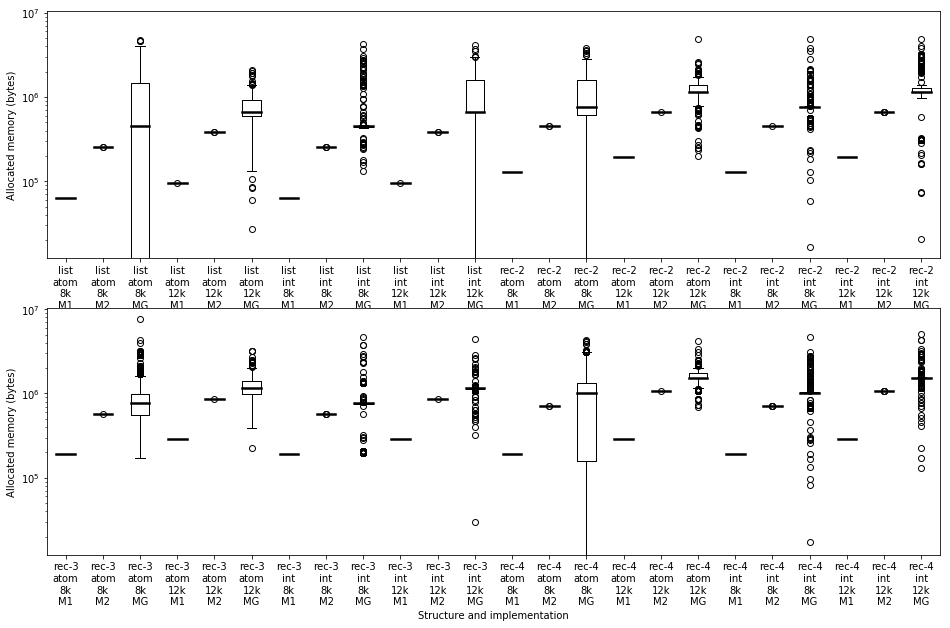

\cline{1-8} \multirow{4}{*}{Cons} & \multirow{2}{*}{Atom} & 8000 & 8 & 32 & (x4.0) & 56 & (x7.1) \\
\cline{3-8}   &   & 12000 & 8 & 32 & (x4.0) & 56 & (x7.1) \\
\cline{2-8}   & \multirow{2}{*}{Int} & 8000 & 8 & 32 & (x4.0) & 56 & (x7.0) \\
\cline{3-8}   &   & 12000 & 8 & 32 & (x4.0) & 56 & (x7.0) \\
\cline{1-8} \multirow{4}{*}{2-features Record} & \multirow{2}{*}{Atom} & 8000 & 16 & 56 & (x3.5) & 96 & (x6.0) \\
\cline{3-8}   &   & 12000 & 16 & 56 & (x3.5) & 96 & (x6.0) \\
\cline{2-8}   & \multirow{2}{*}{Int} & 8000 & 16 & 56 & (x3.5) & 96 & (x6.0) \\
\cline{3-8}   &   & 12000 & 16 & 56 & (x3.5) & 96 & (x6.0) \\
\cline{1-8} \multirow{4}{*}{3-features Record} & \multirow{2}{*}{Atom} & 8000 & 24 & 72 & (x3.0) & 96 & (x4.0) \\
\cline{3-8}   &   & 12000 & 24 & 72 & (x3.0) & 96 & (x4.0) \\
\cline{2-8}   & \multirow{2}{*}{Int} & 8000 & 24 & 72 & (x3.0) & 96 & (x4.0) \\
\cline{3-8}   &   & 12000 & 24 & 72 & (x3.0) & 96 & (x4.0) \\
\cline{1-8} \multirow{4}{*}{4-features Record} & \multirow{2}{*

In [274]:
medium()
from itertools import product
general = Serie("memory", n=range(1), prefix="trueprims")
interesting = [0, 3, 6, 9,]
mozart1 = interesting
mozart2 = [i+1 for i in interesting]
graal = [i+2 for i in interesting]
_general = general
general = general.get("memory", conv=asis)
'''
mozart1 = general.get("memory", sections=mozart1, conv=asis, agg=appended)
mozart2 = general.get("memory", sections=mozart2, conv=asis, agg=appended)
graal = general.get("memory", sections=graal, conv=asis, agg=appended)
ax = []
args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
mozart1.sub(231, init_axis=ax, **args1).plot(legend=0)
mozart2.sub(232, sharey=ax[0], **args2).plot(legend=0)
graal.sub(233, sharey=ax[0], **args2).plot(legend=0)
'''
ax = []
args3 = {"xlabel": "Structure and implementation", "ylabel": "Allocated memory (bytes)"}
sections = [a+"\n"+b+"\n"+c+"\n"+d for a, b, c, d in product(["list", "rec-2", "rec-3", "rec-4"], ["atom", "int"], ["8k", "12k"], ["M1", "M2", "MG"])]
_general.get("memory", conv=asis, sections=range(24)).sub(211, init_axis=ax, **args3).boxplot(sections=sections[:24])
_general.get("memory", conv=asis, sections=range(24, 48)).sub(212, sharey=ax[0], **args3).boxplot(sections=sections[24:48])
plt.show()



for a, struct in enumerate(["Cons", "2-features Record", "3-features Record", "4-features Record"]):
    cline = r"\cline{1-8}"
    aprefix = r"\multirow{4}{*}{%s}" % struct
    for b, typ in enumerate(["Atom", "Int"]):
        if not cline:
            cline = r"\cline{2-8}"
        bprefix = r"\multirow{2}{*}{%s}" % typ
        for c, size in enumerate([8000, 12000]):
            #print(general.mat)
            if not cline:
                cline = r"\cline{3-8}"
            m1, m2, mg = np.median(np.array(general.mat)[a*12+b*6+c*3 :a*12+b*6+c*3+3, :], axis=1)
            print(r"{} {} & {} & {} & {:0.0f} & {:0.0f} & (x{:0.1f}) & {:0.0f} & (x{:0.1f}) \\".format(cline, aprefix, bprefix, size, m1/size,
                                                                   m2/size, m2/m1,
                                                                   mg/size, mg/m1))
            aprefix = " "
            bprefix = " "
            cline = ""

2017-06-08 14:57:20.589497


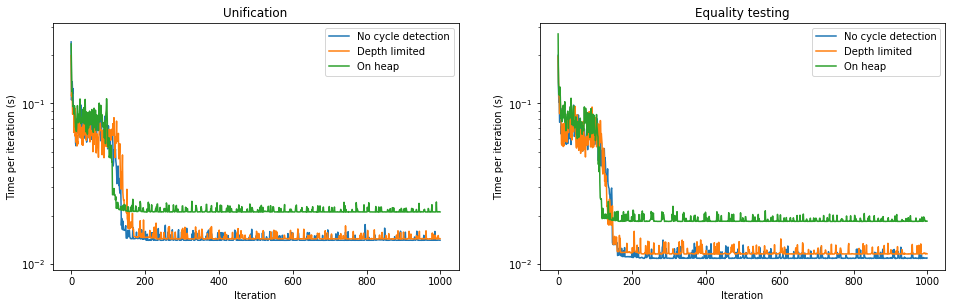

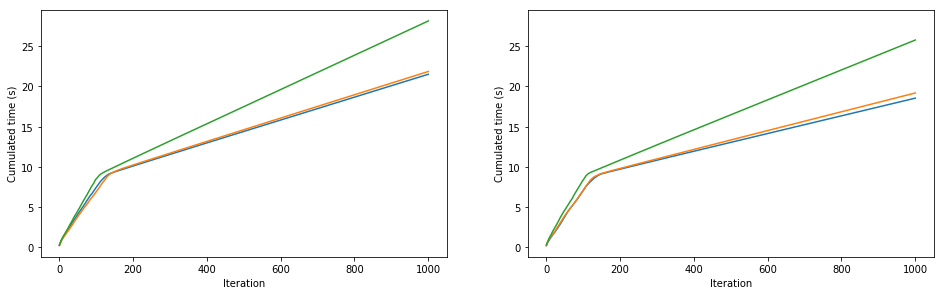

Unification & 14.23 & 14.51 (+1.98\%) & 21.33 (+49.86\%) \\ \hline
Equality & 11.01 & 11.71 (+6.29\%) & 18.62 (+69.11\%) \\ \hline


In [220]:
medium()
unif, equal = Serie("unifequal", prefix="onheap", n=range(5)).get(("=", "=="), agg=mean)
ax = []
args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}
sections = ["No cycle detection", "Depth limited", "On heap"]

unif.sub(221, init_axis=ax, title="Unification", **args1).plot(sections=sections)
equal.sub(222, sharey=ax[0], title="Equality testing", **args1).plot(sections=sections)
plt.show()

unif.sub(223, init_axis=ax, **args2).prog(legend=None)
equal.sub(224, sharey=ax[1], **args2).prog(legend=None)
plt.show()

unif, equal = Serie("unifequal", prefix="onheap", n=range(5)).get(("=", "=="), agg=halfright_appended)
unif = unif.agg(np.mean)
equal = equal.agg(np.mean)
for sec, x in zip(["Unification", "Equality"], [unif, equal]):
    no, cy, cyex = 1000*x
    print(r"""{} & {:.2f} & {:.2f} ({:+.2f}\%) & {:.2f} ({:+.2f}\%) \\ \hline""".format(sec, no,
                                                                  cy, (cy-no)*100/no,
                                                                  cyex, (cyex-no)*100/no)\
          .replace("_", "\_").replace(" graal", ""))

2017-05-29 17:58:49.208196


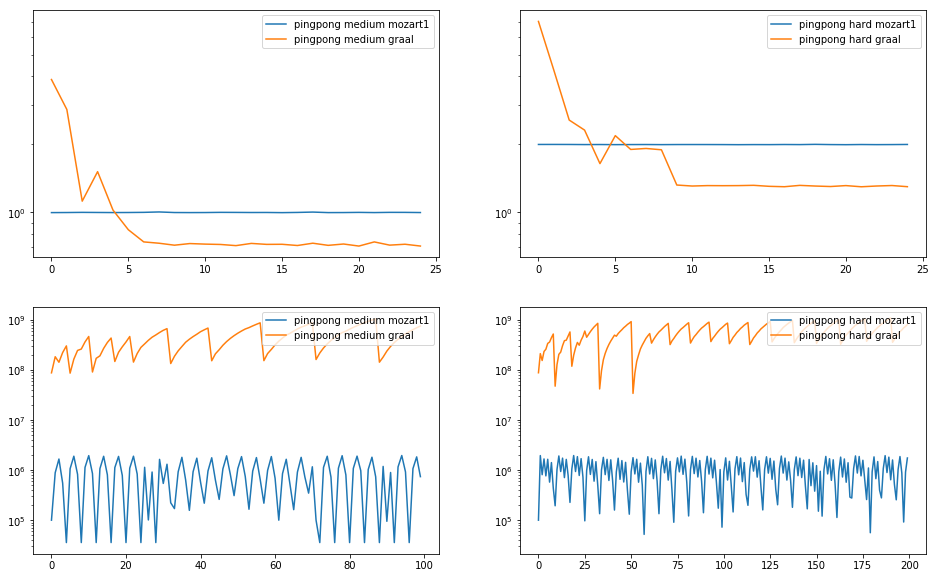

median [ 0.99719181  0.72275037]
median [ 1.9957735   1.31346795]


In [4]:
medium()
pingpong = Serie("pingpong")

medium_iterations = pingpong.get("iteration", sections=[0, 1])
hard_iterations = pingpong.get("iteration", sections=[2, 3])

medium_memory = pingpong.get("memory", sections=[0, 1], conv=asis)
hard_memory = pingpong.get("memory", sections=[2, 3], conv=asis)

ax = []

medium_iterations.sub(221, init_axis=ax).plot()
hard_iterations.sub(222, sharey=ax[0]).plot()

medium_memory.sub(223, init_axis=ax).plot()
hard_memory.sub(224, sharey=ax[1]).plot()
#memory.sub(222).plot()
plt.show()

print("median", medium_iterations.agg(np.median))
print("median", hard_iterations.agg(np.median))

## Pow

In the following graphs, we can see, at the top, the cost of every iteration, and at the bottom, the cumulative time to reach the nth iteration (the plots are vertical in order to be correlated visually)

We can see that

- Graal generally ends up with much faster iterations than mozart2 and the simple truffle interpreter
- Mozart2 is still the big winner in terms of total execution time

2017-05-27 23:36:00.565305


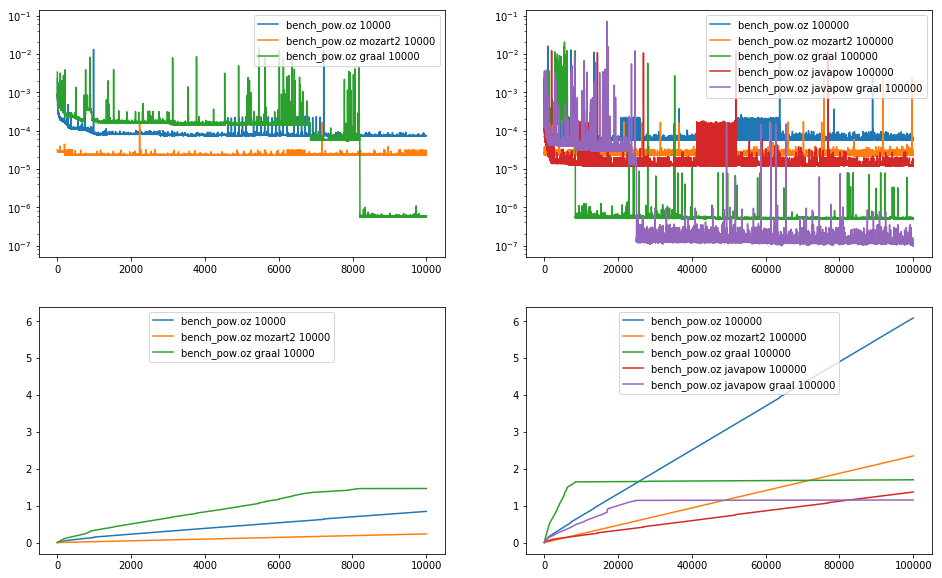

median [  7.39110000e-05   2.30000000e-05   1.44387500e-04]
median [  5.86140000e-05   2.30000000e-05   5.15000000e-07   1.23370000e-05
   1.32000000e-07]


In [46]:
medium()

pow_easy, pow_hard = Serie("pow")["10000", "100000"]
ax = []
pow_easy.sub(221, init_axis=ax).plot()
pow_easy.sub(223, init_axis=ax).prog()

pow_hard.sub(222, sharey=ax[0]).plot()
pow_hard.sub(224, sharey=ax[1]).prog()
plt.show()

print("median", pow_easy.agg(np.median))
print("median", pow_hard.agg(np.median))

## Map

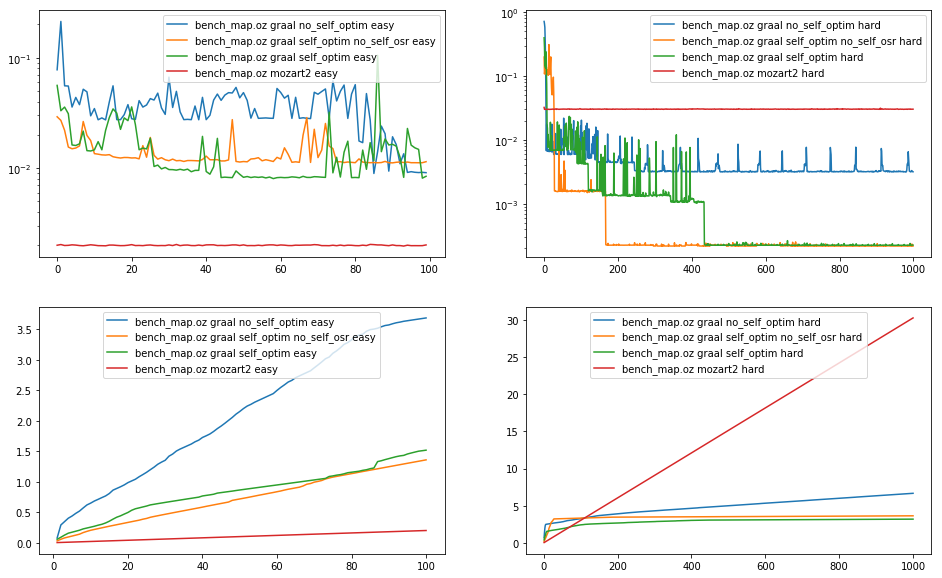

median [ 0.03486617  0.01191818  0.00998661  0.001997  ]
median [ 0.00321291  0.00022389  0.00022576  0.03025   ]


In [29]:
medium()

map_easy, map_hard = Serie("map")["easy", "hard"]

map_easy.sub(221).plot()
map_easy.sub(223).prog()

map_hard.sub(222).plot()
map_hard.sub(224).prog()
plt.show()

print("median", map_easy.agg(np.median))
print("median", map_hard.agg(np.median))

2017-05-28 14:16:53.592532


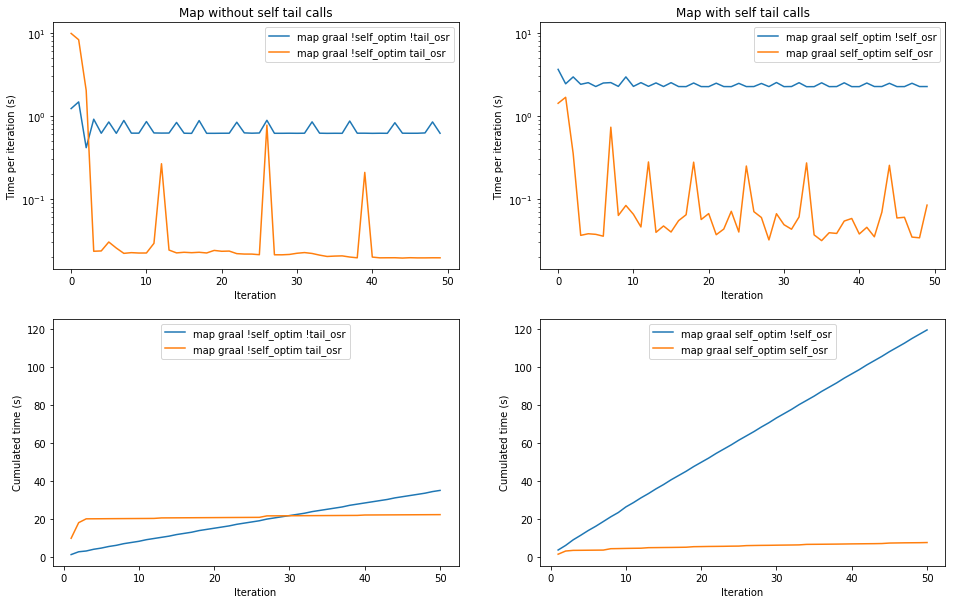

median [ 0.61730934  0.0221538 ]
median [ 2.25415935  0.05560883]


In [63]:
medium()

Map = Serie("map")
tail = Map.get("hard", sections=[0, 1])
self = Map.get("hard", sections=[3, 4])
ax = []

args1 = {"xlabel": "Iteration", "ylabel": "Time per iteration (s)"}
args2 = {"xlabel": "Iteration", "ylabel": "Cumulated time (s)"}

tail.sub(221, init_axis=ax, title="Map without self tail calls", **args1).plot()
tail.sub(223, init_axis=ax, **args2).prog()

self.sub(222, sharey=ax[0], title="Map with self tail calls", **args1).plot()
self.sub(224, sharey=ax[1], **args2).prog()
plt.show()

print("median", tail.agg(np.median))
print("median", self.agg(np.median))

## Flatten

2017-05-29 02:47:24.508886


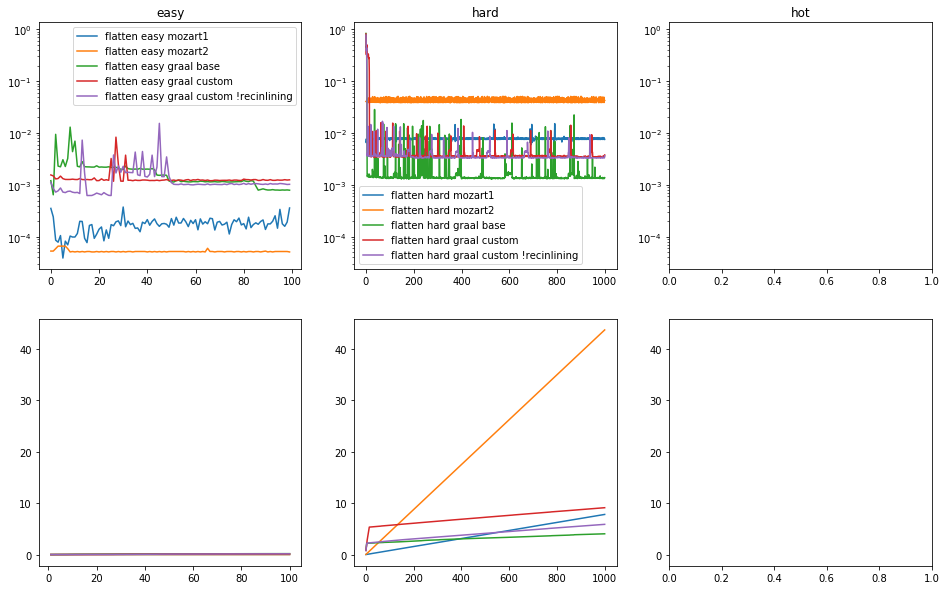

median [  1.76242000e-04   5.20000000e-05   1.20515150e-03   1.23929950e-03
   1.02852000e-03]
median [ 0.00770597  0.043878    0.00136733  0.00356484  0.00335006]
median []


In [144]:
medium()

flatten_easy, flatten_hard = Serie("flatten", n=range(1)).get(("easy", ("hard", "hard_hot")), agg=geomean)

flatten_hard, flatten_hot = flatten_hard
#flatten_hard = merge(flatten_hard, ["{}", "hot {}"])
ax = []

flatten_easy.sub(231, init_axis=ax, title="easy").plot()
flatten_easy.sub(234, init_axis=ax).prog(legend=None)

flatten_hard.sub(232, sharey=ax[0], title="hard").plot(legend=0)
flatten_hard.sub(235, sharey=ax[1]).prog(legend=None)

flatten_hot.sub(233, sharey=ax[0], title="hot").plot()
flatten_hot.sub(236, sharey=ax[1]).prog(legend=None)

plt.show()

print("median", flatten_easy.agg(np.median))
print("median", flatten_hard.agg(np.median))
print("median", flatten_hot.agg(np.median))

2017-06-08 16:16:06.616445


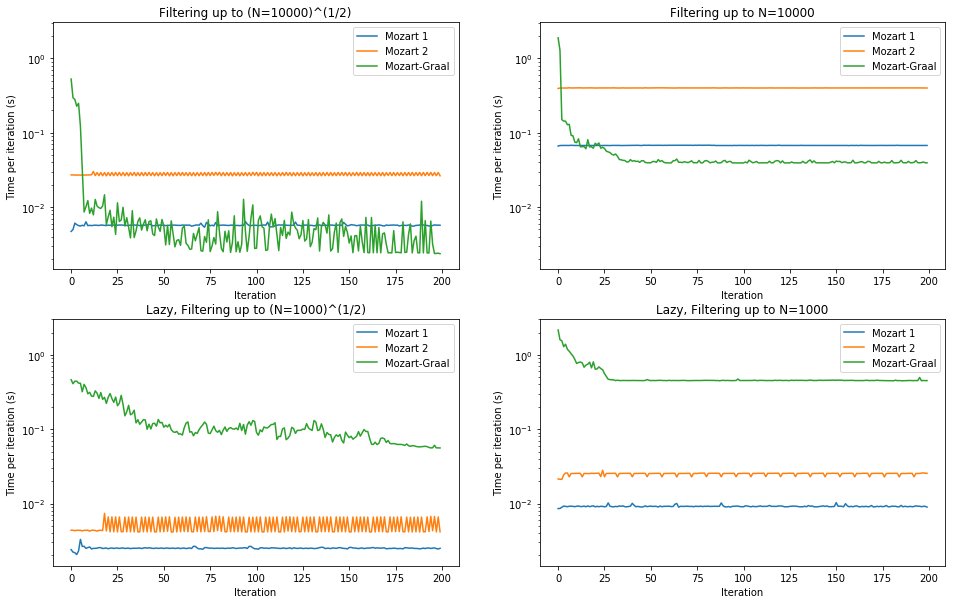

median [ 0.06744451  0.4001709   0.04012989]


In [229]:
medium()

agg = mean
sieve = Serie("sieve", n=range(5), prefix="last")
no_sqrtopt = sieve.get("", sections=list(range(3)), agg=agg)
sqrtopt = sieve.get("", sections=list(range(3, 6)), agg=agg)
lazy_no_sqrtopt = sieve.get("", sections=list(range(6, 9)), agg=agg)
lazy_sqrtopt = sieve.get("", sections=list(range(9, 12)) ,agg=agg)
ax = []

sections=["Mozart 1", "Mozart 2", "Mozart-Graal"]

args = dict(xlabel="Iteration", ylabel="Time per iteration (s)")

sqrtopt.sub(221, title="Filtering up to (N=10000)^(1/2)", init_axis=ax, **args).plot(sections=sections, legend=1)
no_sqrtopt.sub(222, title="Filtering up to N=10000", sharey=ax[0], **args).plot(sections=sections, legend=1)
lazy_sqrtopt.sub(223, title="Lazy, Filtering up to (N=1000)^(1/2)", sharey=ax[0], **args).plot(sections=sections, legend=1)
lazy_no_sqrtopt.sub(224, title="Lazy, Filtering up to N=1000", sharey=ax[0], **args).plot(sections=sections, legend=1)

#hard.sub(222).plot()
#hard.sub(224).prog(legend=None)

plt.show()

print("median", no_sqrtopt.agg(np.median))

2017-06-09 00:23:55.710052


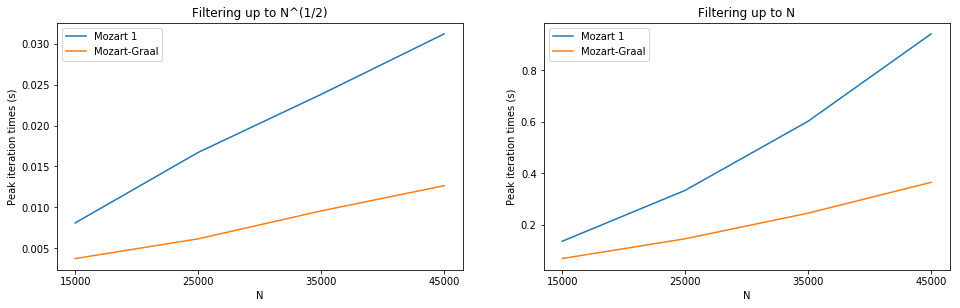

In [259]:
medium()

agg = geomean
sieve = Serie("sieve_meta", n=range(1), prefix="last")
no_sqrtopt = sieve.get("", sections=list(range(2)), agg=agg)
sqrtopt = sieve.get("", sections=list(range(2, 4)), agg=agg)
#lazy_no_sqrtopt = sieve.get("", sections=list(range(6, 9)), agg=agg)
#lazy_sqrtopt = sieve.get("", sections=list(range(9, 12)) ,agg=agg)
ax = []
args1 = dict(ylabel="Peak iteration times (s)", xlabel="N")
sections=["Mozart 1", "Mozart-Graal"]

sqrtopt.sub(221, title="Filtering up to N^(1/2)", init_axis=ax, **args1).plot(sections=sections, yscale=None, legend=0)
plt.xticks([0, 1, 2, 3], [15000, 25000, 35000, 45000])
no_sqrtopt.sub(222, title="Filtering up to N", **args1).plot(sections=sections, yscale=None, legend=0)
plt.xticks([0, 1, 2, 3], [15000, 25000, 35000, 45000])
#lazy_sqrtopt.sub(223, title="Lazy, Filtering up to (N=1000)^(1/2)", sharey=ax[0]).plot(sections=sections, legend=1)
#lazy_no_sqrtopt.sub(224, title="Lazy, Filtering up to N=1000", sharey=ax[0]).plot(sections=sections, legend=1)

#hard.sub(222).plot()
#hard.sub(224).prog(legend=None)

plt.show()

#print("median", sieve.agg(np.median))

2017-05-27 14:42:56.612532


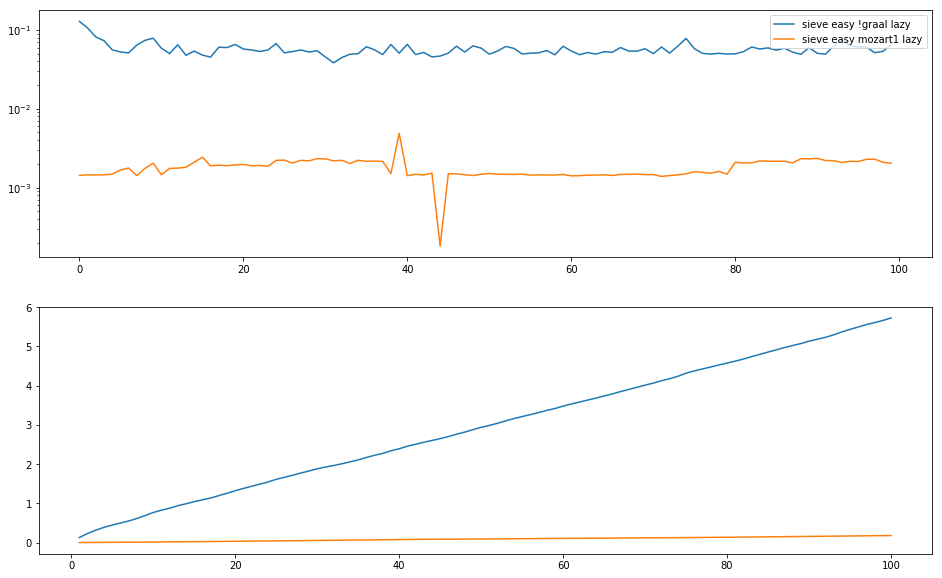

median [ 0.05408813  0.00174979]


In [147]:
medium()

sieve = Serie("sieve", n=range(1)).get("easy")

sieve.sub(211).plot()
sieve.sub(212).prog(legend=None)

plt.show()

print("median", sieve.agg(np.median))

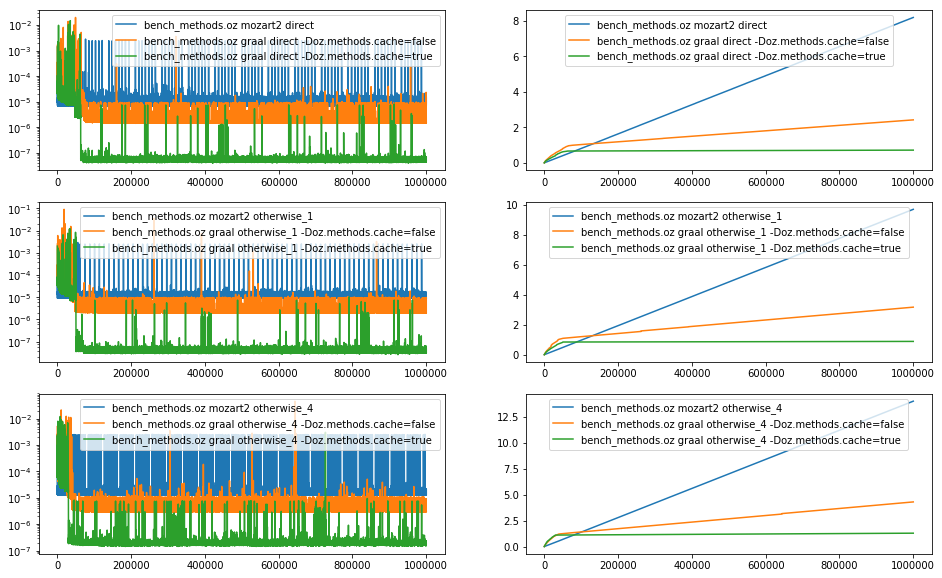

median [  8.00000000e-06   1.52100000e-06   5.40000000e-08]
median [  9.00000000e-06   2.11500000e-06   4.20000000e-08]
median [  1.30000000e-05   3.11100000e-06   1.79000000e-07]


In [57]:
medium()
# As of commit cb63d9c9f1ee2989ddcd80bc73d89c4ce6913af0
direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))

direct.sub(321).plot()
direct.sub(322).prog()
otherwise_1.sub(323).plot()
otherwise_1.sub(324).prog()
otherwise_4.sub(325).plot()
otherwise_4.sub(326).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

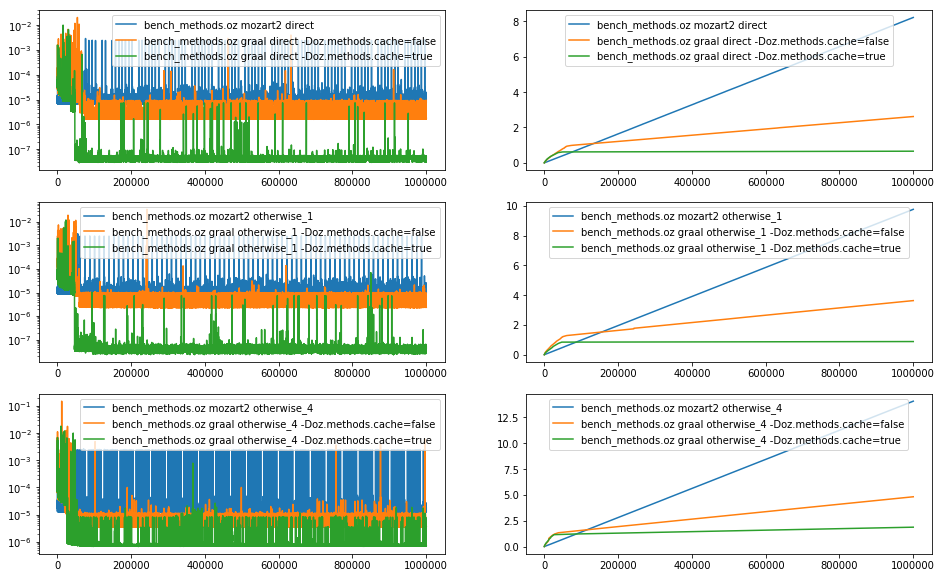

median [  8.00000000e-06   1.73500000e-06   4.30000000e-08]
median [  9.00000000e-06   2.43200000e-06   4.10000000e-08]
median [  1.30000000e-05   3.55300000e-06   7.13000000e-07]


In [60]:
medium()

direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))

direct.sub(321).plot()
direct.sub(322).prog()
otherwise_1.sub(323).plot()
otherwise_1.sub(324).prog()
otherwise_4.sub(325).plot()
otherwise_4.sub(326).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

2017-05-27 23:38:22.733575


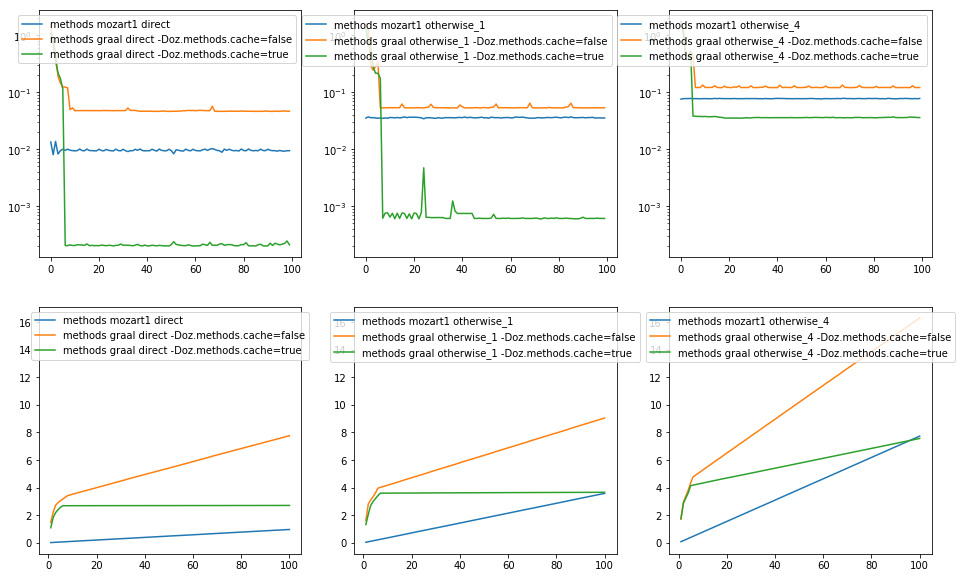

median [ 0.00949142  0.0470277   0.00020539]
median [ 0.03583609  0.05338171  0.0006149 ]
median [ 0.07733194  0.12139969  0.03593187]


In [48]:
medium()

direct, otherwise_1, otherwise_4 = Serie("methods", n=range(1)).get(("direct", "otherwise_1", "otherwise_4"))
ax = []
direct.sub(231, init_axis=ax).plot()
direct.sub(234, init_axis=ax).prog()
otherwise_1.sub(232, sharey=ax[0]).plot()
otherwise_1.sub(235, sharey=ax[1]).prog()
otherwise_4.sub(233, sharey=ax[0]).plot()
otherwise_4.sub(236, sharey=ax[1]).prog().show()

print("median", direct.agg(np.median))
print("median", otherwise_1.agg(np.median))
print("median", otherwise_4.agg(np.median))

## Number of links

In [5]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
None

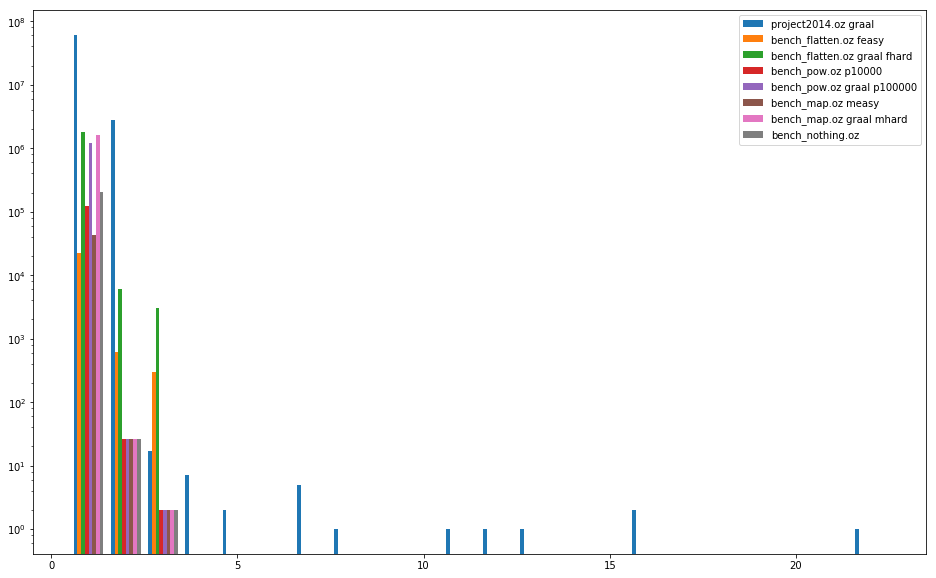

In [6]:
ideal()
nlinks.hist().show()

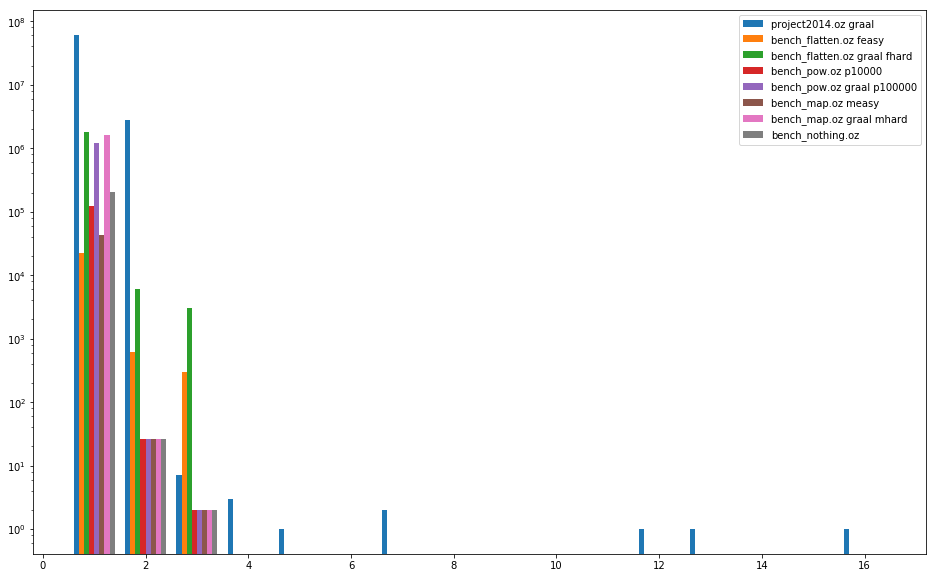

In [10]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
nlinks.hist().show()

In [255]:
ideal()
nlinks = Serie("nlinks", prefix="new").get("nlinks", sections=list(range(0, 8)), conv=asis)

2017-06-08 23:36:23.045537


2017-06-08 23:37:46.615783


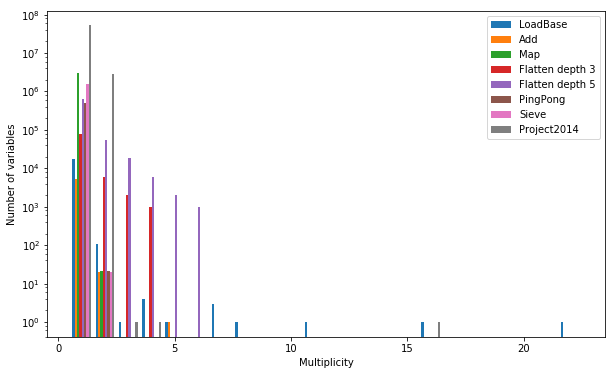

In [256]:
ideal()
sections = [sec.replace(" graal", "") for sec in nlinks.sections]
nlinks.hist(sections=sections)
plt.xlabel("Multiplicity")
plt.ylabel("Number of variables")
plt.show()

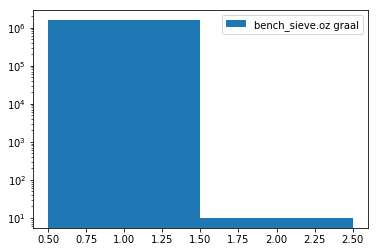

In [74]:
nlinks = Serie("nlinks").get("nlinks", conv=asis)
nlinks.hist().show()

In [21]:
# Without captured variables
nlinks = Serie("nvars").get("nvars", conv=asis)
nlinks.mat

[[83288050], [74816697]]

In [30]:
# Without optimization, with dynamic, with bad one
nlinks = Serie("nvars").get("nvars", conv=asis)
nlinks.mat

[[59047],
 [56237],
 [58625],
 [3660037],
 [3657227],
 [3659615],
 [139146],
 [136320],
 [138722],
 [1219146],
 [1216320],
 [1218722],
 [59652],
 [56821],
 [59229],
 [1623552],
 [1620721],
 [1623129],
 [219143],
 [216320],
 [218720]]

In [187]:
# With good static one, without
nvars = Serie("nvars").get("nvars", conv=asis)
direct = [x[0] for x in nvars.mat[0::3]]
deopt_v = [x[0] for x in nvars.mat[1::3]]
deopt_pv = [x[0] for x in nvars.mat[2::3]]
sections = nvars.sections[0::3]
#print("\n".join(str(x) for x in nvars.mat))
for sec, d, dv, dpv in zip(sections, direct, deopt_v, deopt_pv):
    v=dv-d
    p=dpv-dv
    dp=d+p
    vp = p+v
    assert dp == dpv-v
    assert vp == dpv-d
    
    print(r"""{} & {} & {} ({:.2f}\%) & {} ({:.2f}\%) & {} ({:.2f}\%) \\ \hline""".format(sec, dpv,
                                                                  dv, -p*100/dpv,
                                                                  dp, -v*100/dpv,
                                                                  d, -vp*100/dpv)\
          .replace("_", "\_").replace(" graal", ""))

Add & 53109 & 21913 (-58.74\%) & 50564 (-4.79\%) & 19368 (-63.53\%) \\ \hline
Map & 5053657 & 3022142 (-40.20\%) & 5051091 (-0.05\%) & 3019576 (-40.25\%) \\ \hline
Flatten & 2845146 & 1357947 (-52.27\%) & 2842593 (-0.09\%) & 1355394 (-52.36\%) \\ \hline
PingPong & 1053669 & 522143 (-50.45\%) & 1051102 (-0.24\%) & 519576 (-50.69\%) \\ \hline
Sieve & 3170702 & 1578868 (-50.20\%) & 3168155 (-0.08\%) & 1576321 (-50.28\%) \\ \hline
Project2014 & 139775829 & 83288481 (-40.41\%) & 131305383 (-6.06\%) & 74818035 (-46.47\%) \\ \hline
LoadBase & 50450 & 20589 (-59.19\%) & 48027 (-4.80\%) & 18166 (-63.99\%) \\ \hline


In [109]:
# With good static one, without
selclear = Serie("selection_clearing", prefix="doing", n=3).get("", conv=asis)
none = [np.median(x) for x in selclear.mat[0::3]]
selection = [np.median(x) for x in selclear.mat[1::3]]
selection_clearing = [np.median(x) for x in selclear.mat[2::3]]
sections = selclear.sections[0::3]
for sec, n, s, sc in zip(sections, none, selection, selection_clearing):
    print(r"""{} & {} & {} ({:+.2f}\%) & {} ({:+.2f}\%) \\ \hline""".format(sec, n,
                                                                  s, (s-n)*100/n,
                                                                  sc, (sc-n)*100/n)\
          .replace("_", "\_").replace(" graal", ""))

Add           no\_selection   no\_clearing & 1258139.5 & 1519778.5 (+20.80\%) & 24490830.0 (+1846.59\%) \\ \hline
Map           no\_selection   no\_clearing & 34998114.5 & 38367990.5 (+9.63\%) & 20614576.0 (-41.10\%) \\ \hline
Flatten       no\_selection   no\_clearing & 25678290.5 & 21713150.5 (-15.44\%) & 19179418.0 (-25.31\%) \\ \hline
PingPong      no\_selection   no\_clearing & 112929568.5 & 73767661.5 (-34.68\%) & 83566127.5 (-26.00\%) \\ \hline
Sieve         no\_selection   no\_clearing & 40960612.0 & 42015373.0 (+2.58\%) & 39628459.5 (-3.25\%) \\ \hline
Project2014   no\_selection   no\_clearing & 5958759226.5 & 5400611455.0 (-9.37\%) & 5866951023.5 (-1.54\%) \\ \hline


## Project

In [7]:
print(Serie("project")["total"].sections)
Serie("project")["total"].mat

['project2014.oz mozart2', 'project2014.oz graal', 'project2014.oz graal no_unlink']


array([[ 24.397664  ],
       [ 16.03142228],
       [ 25.20116312]])

In [15]:
print(Serie("project")["total"].sections)
Serie("project")["total"].mat

['project2014.oz mozart2', 'project2014.oz graal', 'project2014.oz graal no_unlink']


array([[ 25.075385  ],
       [ 20.38533012],
       [ 23.74126553]])

In [75]:
print(Serie("project")["total"].sections)
print(Serie("project", n=range(20)).get("total", agg=mean).mat)
print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

['project2014.oz graal', 'project2014.oz graal lazyvars', 'project2014.oz graal no_unlink']
[[ 18.14043916]
 [ 19.04286377]
 [ 22.77929087]]
[[83288050], [74816695], [83288050]]


In [80]:
print(Serie("project")["total"].sections)
print(Serie("project", n=range(1)).get("total", agg=mean).mat)
print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

['project2014.oz graal no_direct', 'project2014.oz graal', 'project2014.oz graal no_unlink']
[[ 16.91007273]
 [ 20.76421235]
 [ 24.9695205 ]]
[[83288228], [74817332], [74817332]]


2017-06-01 15:03:18.346906


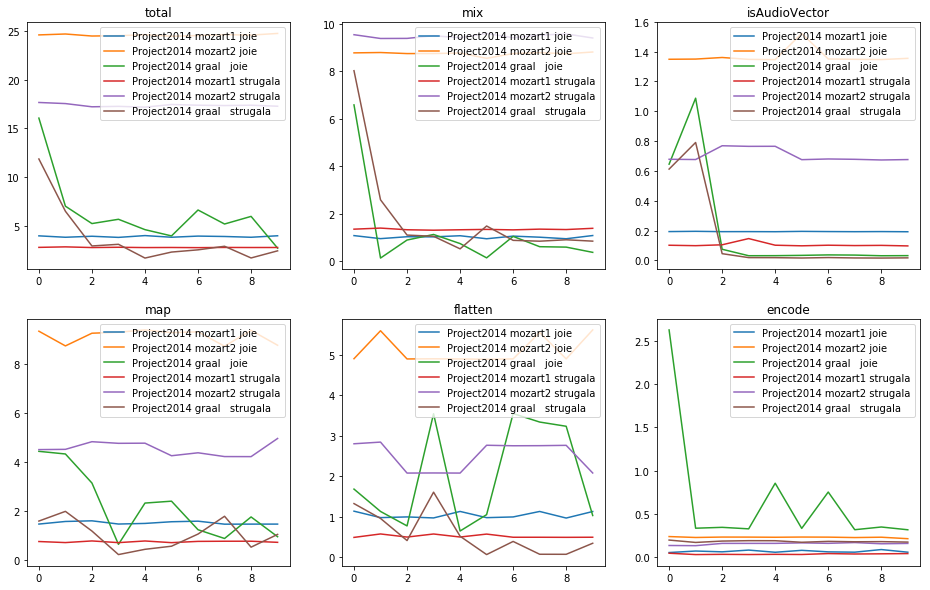

In [277]:
medium()
project = Serie("project", n=range(1))
total, mix, isAudio, map_, flatten, encode = project.get(("", "mix", "isAudioVector", "mapped", "flattenned", "encoded"), agg=geomean)

total.sub(231, title="total").plot(yscale=None)
mix.sub(232, title="mix").plot(yscale=None)
isAudio.sub(233, title="isAudioVector").plot(yscale=None)
map_.sub(234, title="map").plot(yscale=None)
flatten.sub(235, title="flatten").plot(yscale=None)
encode.sub(236, title="encode").plot(yscale=None)
#print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

2017-06-09 00:50:10.263845
[]


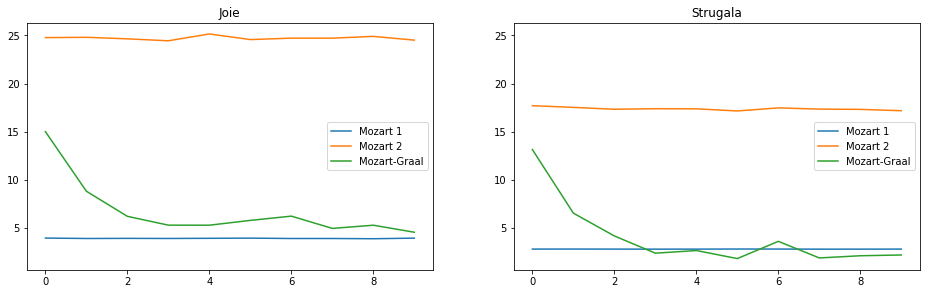

In [264]:
medium()
print(Serie("project")["total"].sections)
project = Serie("general", n=range(5))
total, mix, isAudio, map_, flatten, encode = project.get(("", "mix", "isAudioVector", "mapped", "flattenned", "encoded"),
                                                         sections=range(15, 18),
                                                         agg=geomean)
total2, mix, isAudio, map_, flatten, encode = project.get(("", "mix", "isAudioVector", "mapped", "flattenned", "encoded"),
                                                         sections=range(18, 21),
                                                         agg=geomean)
ax = []
sections= ["Mozart 1", "Mozart 2", "Mozart-Graal"]
total.sub(221, init_axis=ax, title="Joie").plot(legend="right", sections=sections, yscale=None)
total2.sub(222, sharey=ax[0], title="Strugala").plot(legend="right",yscale=None, sections=sections)

#mix.sub(232, sharey=ax[0], title="mix").plot(yscale=None)
#isAudio.sub(233, sharey=ax[0], title="isAudioVector").plot(yscale=None)
#map_.sub(234, sharey=ax[0], title="map").plot(yscale=None)
#flatten.sub(235, sharey=ax[0], title="flatten").plot(yscale=None)
#encode.sub(236, sharey=ax[0], title="encode").plot(yscale=None)

#print(Serie("project", n=range(1)).get("nvars", conv=asis).mat)

## Cost of measurements

Of course, in the previous graphs, it may have been possible the measure would be non-negligible in some results. Let's plot a no-op benchmark in order to see the order of magnitude

2017-06-08 12:47:26.906260


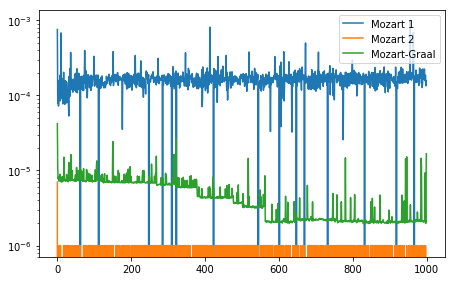

median [  1.61753000e-04   0.00000000e+00   4.24850000e-06]


In [181]:
medium()

nothing = Serie("nothing").get("", sections=[0, 1, 3])
nothing.sub(221).plot(sections=["Mozart 1", "Mozart 2", "Mozart-Graal"])
plt.show()

print("median", nothing.agg(np.median))

2017-06-09 11:18:44.829539


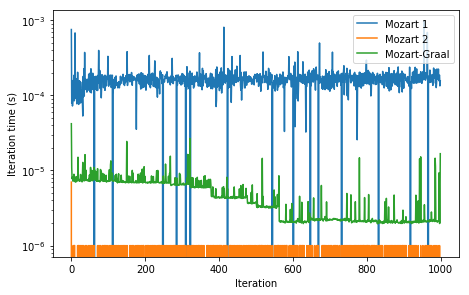

peak iteration [ 0.16739458  0.000372    0.00257047]

Mozart 1 & 1.67e-01 \\ \hline
Mozart 2 & 3.72e-04 \\ \hline
Mozart-Graal & 2.57e-03 \\ \hline


In [269]:
medium()

nothing = Serie("nothing").get("", sections=[0, 1, 3])
nothing.sub(221, xlabel="Iteration", ylabel="Iteration time (s)").plot(sections=["Mozart 1", "Mozart 2", "Mozart-Graal"])
plt.show()

peak = Serie("nothing").get("", sections=[0, 1, 3], agg=halfright_appended).agg(np.mean)*1000
print("peak iteration", peak)

print(r"""
Mozart 1 & {:0.2e} \\ \hline
Mozart 2 & {:0.2e} \\ \hline
Mozart-Graal & {:0.2e} \\ \hline""".format(*peak))